# analyze results of chemical property prerdiction


In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [17]:
#extra
path_list=["res/8.json","res/8_pls.json","res/extra_8dim_gp2022-07-14 10:57:51.json"] # xdim=8, qubit=8, depth=3, extra

#inner
path_list=["res/8dim_inner.json","res/inner_8dim_pls2022-05-19 09 25 02.json",
"res/inner_8dim_gp2022-07-13 11:33:20.json"] 

#inner 4d
#path_list=["res/inner_4d.json","res/inner_4dim_pls2022-05-19 09 25 26.json",
#"res/inner_4dim_gp2022-07-14 13:19:16.json"] 

res_dict={}
for path in path_list:
    with open(path,"r") as f:
        json_str=f.read()

    temp_dict=json.loads(json_str)
    res_dict.update(temp_dict)

In [18]:

res_df=pd.DataFrame.from_dict(res_dict).T
#mean_df=res_df.groupby("Model").mean()
#std_df=res_df.groupby("Model").std()
res_df.groupby("Model").mean()

/tmp/ipykernel_14716/3250594689.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  res_df.groupby("Model").mean()


,Train,Test,Records
Model,,,
BYR,0.002722,0.305691,26.807302
BYR-8-dim,0.038418,0.392323,26.807302
GP(RBF+Dot+White),0.000069,0.316619,26.807302
GP(RBF+Dot+White)-8-dim,0.019663,0.450929,26.807302
PLS,0.001030,0.967668,26.807302
PLS-8-dim,0.025448,28275.749763,26.807302
QCL-8-dim,0.017236,0.406177,26.807302
RFR,0.041402,0.321352,26.807302
RFR-8-dim,0.048832,0.401819,26.807302


In [19]:
db_list=list(set(res_df["Database"]))
db_list

['ESOL', 'MP', 'Lipo', 'Solv']

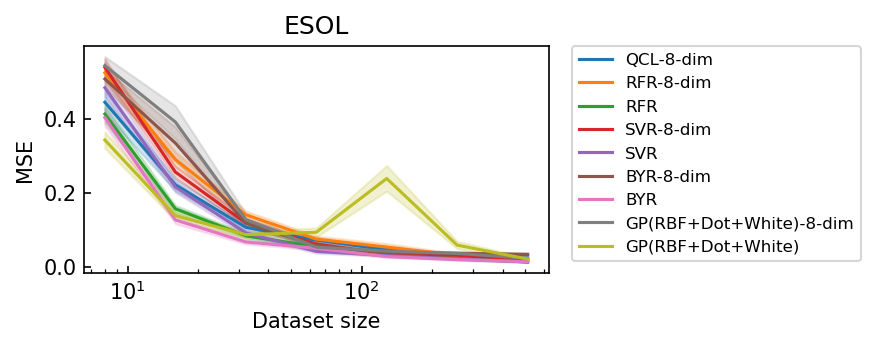

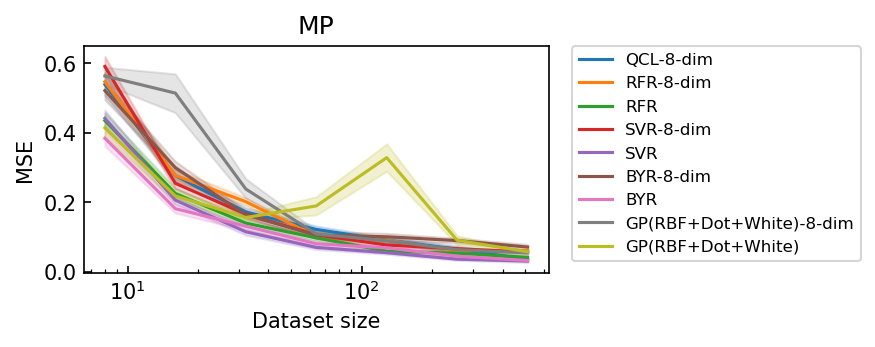

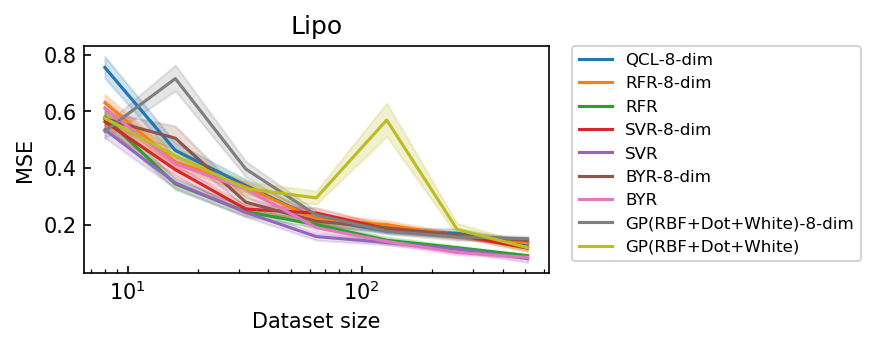

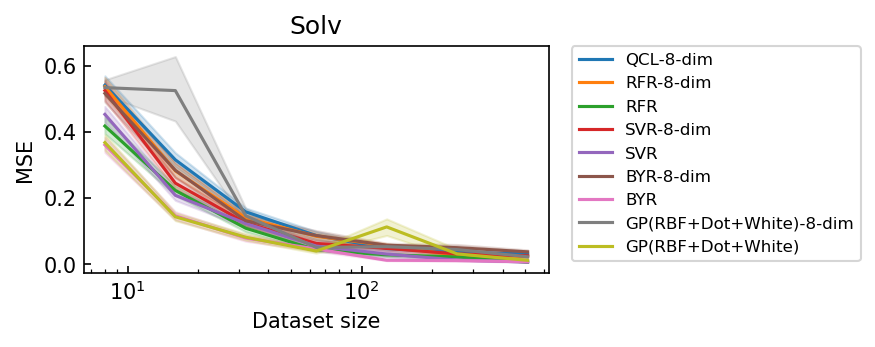

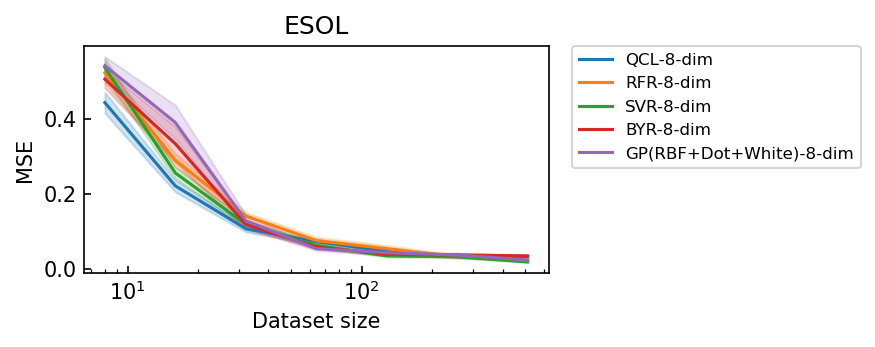

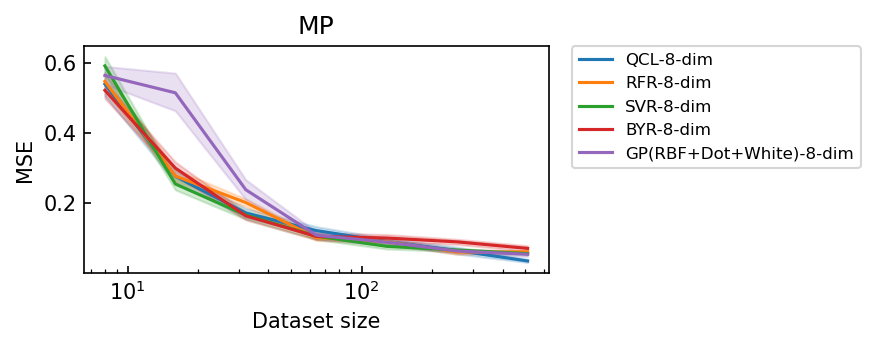

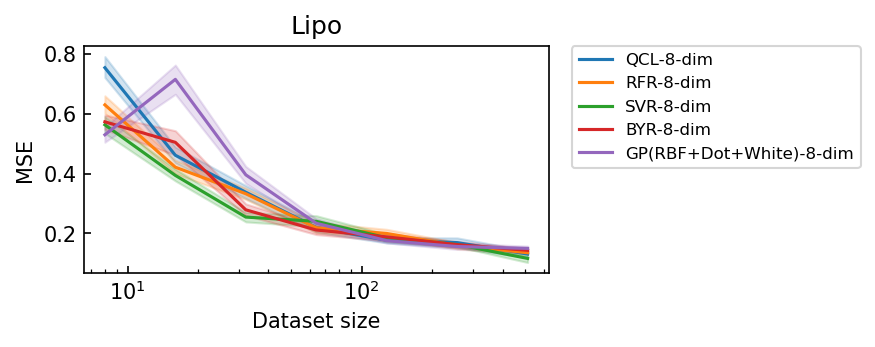

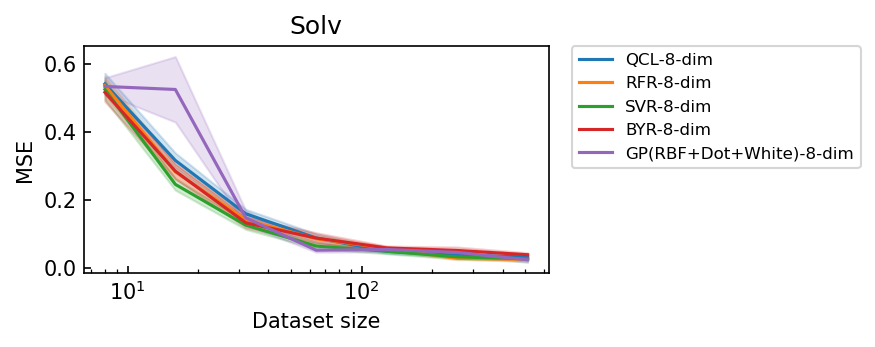

In [20]:

for i in range(2):
    for db_name in db_list:

        sel_df=res_df[res_df["Database"]==db_name]
        sel_df=sel_df[sel_df["Model"].str.find("PLS")==-1]

        if i==1:
            sel_df=sel_df[sel_df["Model"].str.find("dim")>0]
        
        fig = plt.figure(figsize=(4,2),dpi=150)
        sns.lineplot(data=sel_df,x="Records",y="Test",hue="Model",ci=68)
        plt.title(db_name)

        #plt.yscale('log')
        plt.xscale('log')
        plt.ylabel("MSE")
        plt.xlabel("Dataset size")


        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)


In [38]:
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

def swam_plot(sel_df,db_name):

    n_record_list=sorted(list(set(sel_df["Records"])))

    fig = plt.figure(figsize=(12,2),dpi=100)
    #plt.title(db_name)
    plt.subplots_adjust(wspace=0.5, hspace=0.6)
    for i in range(len(n_record_list)):
        ax = fig.add_subplot(1, len(n_record_list), i+1)

        target_record_df=sel_df[sel_df["Records"]==n_record_list[i]]
        sns.boxplot(data=target_record_df,x="Records",y="Test",hue="Model",ax=ax)
        y_lim=list(ax.get_ylim())
        y_lim[1]=min(4,y_lim[1])
        y_lim[0]=max(0,y_lim[0])
        ax.set_ylim(*y_lim)
        plt.legend([],[], frameon=False)
        ax.set_xlabel("")
        if i==0:
            ax.set_ylabel("MSE")
            ax.set_title(db_name)
        else:
            ax.set_ylabel("")

        if i==len(n_record_list)-1:
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)

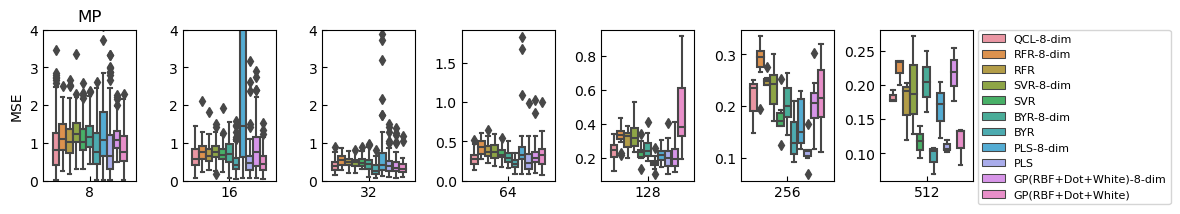

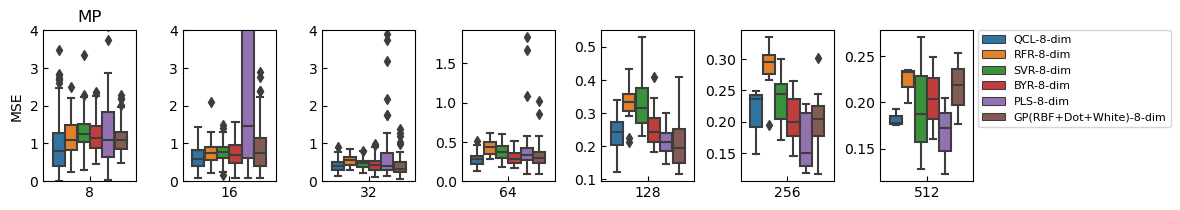

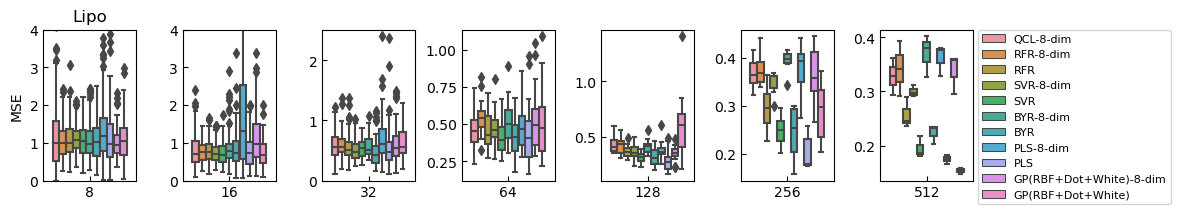

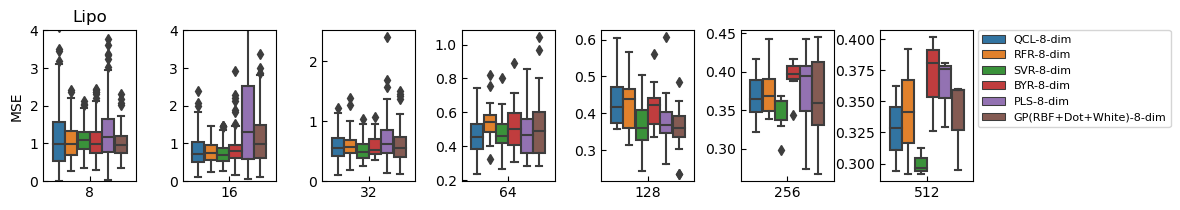

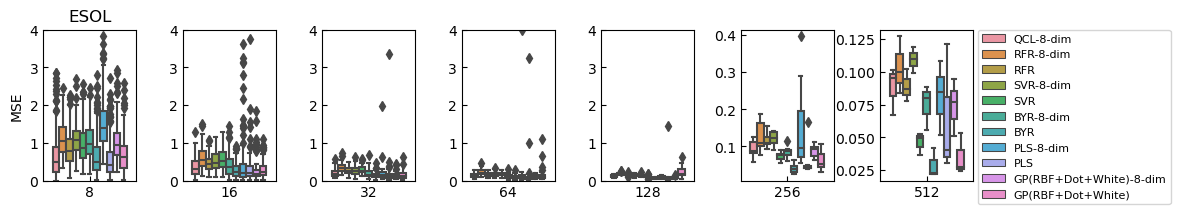

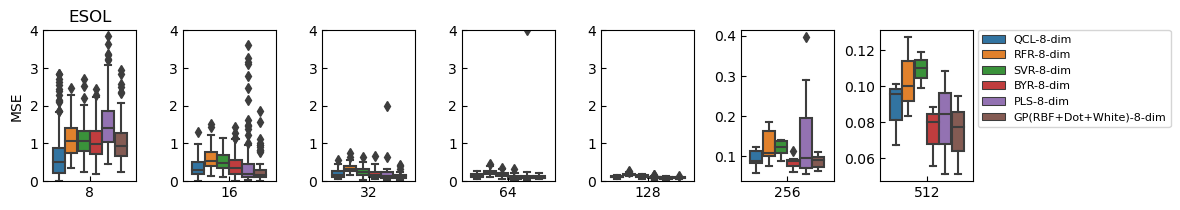

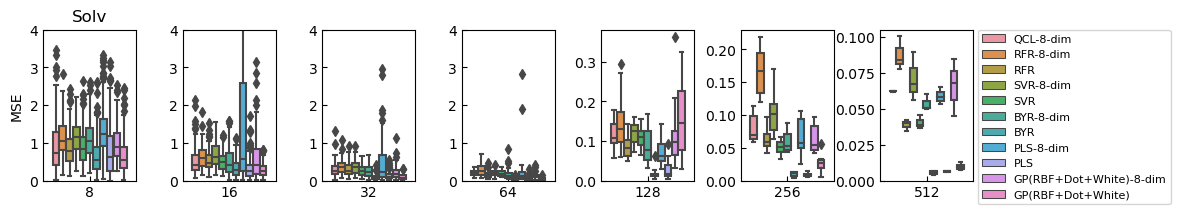

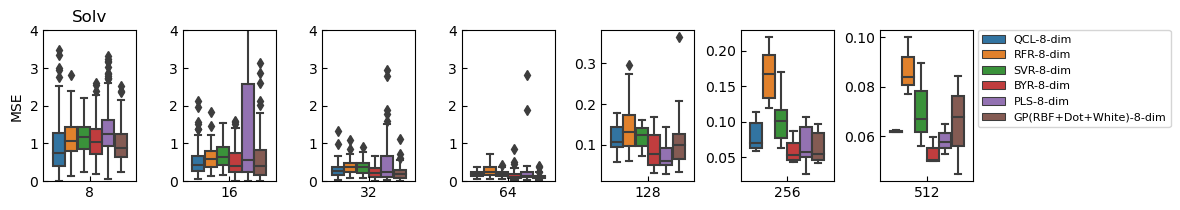

In [39]:

for db_name in db_list:
    sel_df=res_df[res_df["Database"]==db_name]
    dim_df=sel_df[sel_df["Model"].str.find("dim")>0]
    swam_plot(sel_df,db_name)
    swam_plot(dim_df,db_name)

MP


BYR-8-dim                  3.142857
GP(RBF+Dot+White)-8-dim    2.714286
PLS-8-dim                  2.857143
QCL-8-dim                  2.142857
RFR-8-dim                  5.285714
SVR-8-dim                  4.857143
dtype: float64

Lipo


BYR-8-dim                  4.285714
GP(RBF+Dot+White)-8-dim    2.857143
PLS-8-dim                  4.857143
QCL-8-dim                  2.714286
RFR-8-dim                  4.428571
SVR-8-dim                  1.857143
dtype: float64

ESOL


BYR-8-dim                  2.857143
GP(RBF+Dot+White)-8-dim    1.428571
PLS-8-dim                  3.000000
QCL-8-dim                  3.000000
RFR-8-dim                  5.428571
SVR-8-dim                  5.285714
dtype: float64

Solv


BYR-8-dim                  1.857143
GP(RBF+Dot+White)-8-dim    2.142857
PLS-8-dim                  3.142857
QCL-8-dim                  3.285714
RFR-8-dim                  5.571429
SVR-8-dim                  5.000000
dtype: float64

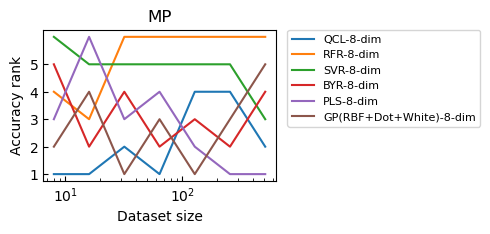

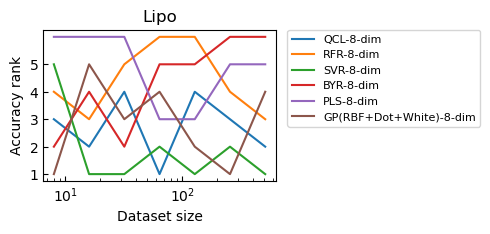

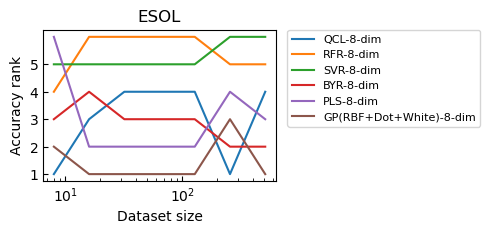

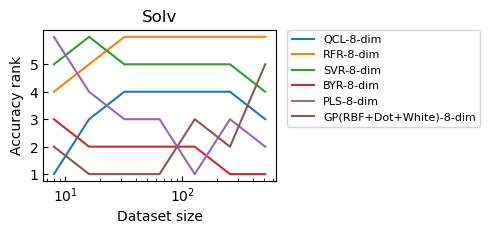

In [40]:

from matplotlib.ticker import MultipleLocator
for db_name in db_list:
    
    rank_dict={}
    sel_df=res_df[res_df["Database"]==db_name]
    sel_df=sel_df[sel_df["Model"].str.find("dim")>0]

    n_record_list=sorted(list(set(sel_df["Records"])))
    for i in range(len(n_record_list)):
        target_record_df=sel_df[sel_df["Records"]==n_record_list[i]]

        median_df=target_record_df.groupby("Model")["Test"].median()
        temp_dict=median_df.rank().to_dict()
        rank_dict[n_record_list[i]]=temp_dict


    rank_df=pd.DataFrame.from_dict(rank_dict)
    print(db_name) 
    display(rank_df.T.mean())
    temp_df=rank_df.T.reset_index()
    temp_df=temp_df.astype(int)

    plt.figure(figsize=(3,2),dpi=100)
    #for col in temp_df.columns:
    for col in [ 'QCL-8-dim', 'RFR-8-dim', 'SVR-8-dim','BYR-8-dim' ,"PLS-8-dim","GP(RBF+Dot+White)-8-dim"]:
    #for col in [ 'QCL-4-dim', 'RFR-4-dim', 'SVR-4-dim','BYR-4-dim' ,"PLS-4-dim","GP(RBF+Dot+White)-4-dim"]:
        try:
            sns.lineplot(data=temp_df,x="index",y=col,label=col)
        except:
            pass

    plt.title(db_name)
    plt.xlabel("Dataset size")
    plt.xscale("log")
    plt.ylabel("Accuracy rank")
    ax = plt.gca()
    ax.yaxis.set_major_locator(MultipleLocator(1)) 
    #plt.xticks([8,64,128,256,512])
    plt.yticks([1,2,3,4,5])

    #plt.ylim(4,1)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)

In [11]:
temp_df.columns

Index(['index', 'BYR-8-dim', 'GP(RBF+Dot+White)-8-dim', 'PLS-8-dim',
       'QCL-8-dim', 'RFR-8-dim', 'SVR-8-dim'],
      dtype='object')